## Programming Exercise 5: Regularized Linear Regression and Bias vs. Variance
* Where values are None, insert your code

### 1 Regularized Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression

import warnings
warnings.filterwarnings('ignore')

#### 1.1 Visualizing the dataset

In [2]:
#Load data
datafile = 'ex5data1.mat'
data = sio.loadmat(datafile)
#Training set
X = data['X']
y = data['y']
#Cross validation set
Xval = data['Xval']
yval = data['yval']
#Test set
Xtest = data['Xtest']
ytest = data['ytest']

#Insert a column of 1's to all of the X's, as usual
#Why? If i use below code my graph is messed up
#X = np.insert(X,0,1,axis=1)
#Xval = np.insert(Xval,0,1,axis=1)
#Xtest = np.insert(Xtest,0,1,axis=1)

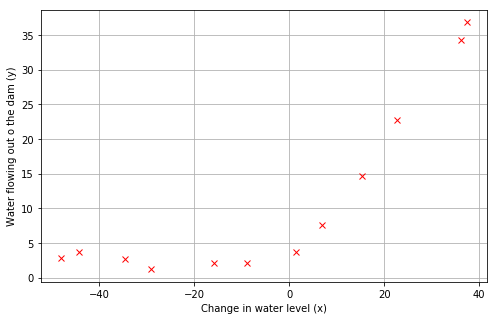

In [3]:
def plotData():
    plt.figure(figsize=(8,5))
    plt.ylabel('Water flowing out o the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X, y,'rx')
    plt.grid(True)
    
plotData()

#### 1.2 Regularized linear regression cost function

In [4]:
#Insert 1's
X = np.insert(X,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)


def computeCost(X, y, theta, mylambda): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #m = X.shape[0]
    #myh = h(mytheta, myX)
    #mycost = 1.0/(2.0*m)*np.sum((myh-myy)**2)
    #regterm = (mylambda/(2.0*m))*np.sum(mytheta**2)
    #return mycost + regterm
    
    #training ex
    m = len(X)
    
    #Shape of theta
    theta = theta.reshape(-1, y.shape[1])
    
    #Compute Cost
    mycost = (1/(2*m))*np.sum(np.square(np.dot(X, theta)-y))
    
    #reg
    regterm = (mylambda/(2*m))*np.sum(np.square(theta[1:len(theta)]))
    
    return mycost + regterm
    
    



In [5]:
# Using theta initialized at [1; 1], and lambda = 1, you should expect to 
# see an output of 303.993192
theta = np.array([[1.],[1.]])
print(computeCost(X, y, theta, mylambda=1))

303.9931922202643


#### 1.3 Regularized linear regression gradient

In [6]:
def computeGradient(X, y, theta, mylambda):
    
    #training ex
    m = len(X)
    
    #Shape of theta
    theta = theta.reshape(-1, y.shape[1])
    
    
    #init grad
    grad = np.zeros(theta.shape)
    
    #compute grad j>=1
    grad = (1 / m) * np.dot(X.T, np.dot(X, theta) - y) + (mylambda / m ) * theta
    
    #compute grad j=0
    nonreg_grad = (1/m)*np.dot(X.T, np.dot(X, theta)-y)
    
    #replace grad of theta 0 in grad
    #grad[0] = nonreg_grad
    
    
    return grad.flatten()
    
    
    
    
#the code below is just a more convuluted way of doing things 
#Here's a wrapper for computeGradient that flattens the output
#This is for the minimization routine that wants everything flattened
#def computeGradientFlattened(X, y, theta, mylambda):
#   return computeGradient(X, y, theta, mylambda).flatten()

#### 1.4 Fitting linear regression

In [7]:
# Using theta initialized at [1; 1] you should expect to see a
# gradient of [-15.303016; 598.250744] (with lambda=1)
theta = np.array([[1.],[1.]])

print(computeGradient(X, y, theta, mylambda=1))

[-15.21968234 598.25074417]


In [8]:
#didnot understand the code 
def optimizeTheta(X, y, theta, mylambda, print_output=True): 
    
    fit_theta = scipy.optimize.fmin_cg(computeCost, x0=theta,\
                                       fprime=computeGradient\
                                       args=(X, y, mylammbda)\ 
                                       disp=print_output\ 
                                       epsilon=1.49e-12\
                                       maxiter=1000)
    
    fit_theta = fit_theta.reshape((theta,1)) 
    
    return fit_theta

SyntaxError: invalid syntax (<ipython-input-8-0d31f86d652b>, line 4)

In [9]:
theta = np.array([[1.],[1.]])
fit_theta = optimizeTheta(X, y, theta, mylambda=0)

NameError: name 'optimizeTheta' is not defined

NameError: name 'fit_theta' is not defined

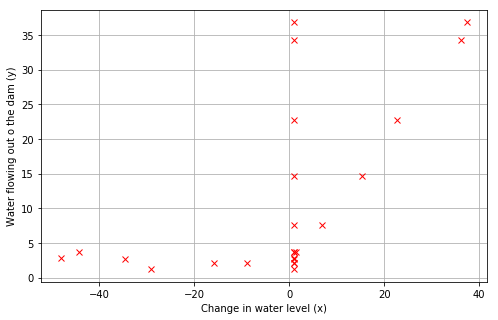

In [10]:
plotData()
plt.plot(X,X.dot(fit_theta).flatten())

### 2 Bias-variance

#### 2.1 Learning curves

In [15]:
def plotLearningCurve():
    """
    Loop over first training point, then first 2 training points, then first 3 ...
    and use each training-set-subset to find trained parameters.
    With those parameters, compute the cost on that subset (Jtrain)
    remembering that for Jtrain, lambda = 0 (even if you are using regularization).
    Then, use the trained parameters to compute Jval on the entire validation set
    again forcing lambda = 0 even if using regularization.
    Store the computed errors, error_train and error_val and plot them.
    """
    initial_theta = np.array([[1.],[1.]])
    mym, error_train, error_val = [], [], []
    for x in range(1,13,1):
        train_subset = None
        y_subset = None
        mym.append(None)
        fit_theta = optimizeTheta(None,None,None,mylambda=0.,print_output=False)
        error_train.append(computeCost(None,None,None,mylambda=0.))
        error_val.append(computeCost(None,None,None,mylambda=0.))
        
    plt.figure(figsize=(8,5))
    plt.plot(None,None,label='Train')
    plt.plot(None,None,label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)

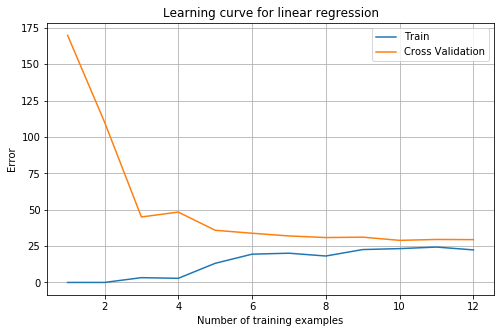

In [16]:
#"You can observe that both the train error and cross validation error are high
# when the number of training examples is increased. This reflects a high bias 
# problem in the model – the linear regression model is too simple and is unable 
# to fit our dataset well."
plotLearningCurve()

### 3 Polynomial regression

In [20]:
def genPolyFeatures(myX,p):
    """
    Function takes in the X matrix (with bias term already included as the first column)
    and returns an X matrix with "p" additional columns.
    The first additional column will be the 2nd column (first non-bias column) squared,
    the next additional column will be the 2nd column cubed, etc.
    """
    newX = myX.copy()
    for i in range(p):
        dim = None
        newX = np.insert(None,None.shape[1],np.power(None,None),axis=1)
    return newX

def featureNormalize(myX):
    """
    Takes as input the X array (with bias "1" first column), does
    feature normalizing on the columns (subtract mean, divide by standard deviation).
    Returns the feature-normalized X, and feature means and stds in a list
    Note this is different than my implementation in assignment 1...
    You should subtract the means, THEN compute std of the
    mean-subtracted columns.
    Doesn't make a huge difference, I've found
    """
   
    Xnorm = myX.copy()
    stored_feature_means = np.mean(None,axis=None) #column-by-column
    Xnorm[:,1:] = None
    stored_feature_stds = np.std(None,axis=None,ddof=None)
    Xnorm[:,1:] = None / stored_feature_stds[1:]
    return Xnorm, stored_feature_means, stored_feature_stds
    

#### 3.1 Learning Polynomial Regression

In [21]:
#Generate an X matrix with terms up through x^8
#(7 additional columns to the X matrix)

###############################################################
# My d=8 plot doesn't match the homework pdf, due to differences
# between scipy.optimize.fmin_cg and the octave version
# I see that in subokita's implementation, for fitting he gets the
# same results as I when using scipy.optimize.fmin_cg
# 
# The d=5 plot (up through x^6) shows overfitting clearly, so I'll
# continue using that
###############################################################

global_d = 5
newX = genPolyFeatures(None,None)
newX_norm, stored_means, stored_stds = None
#Find fit parameters starting with 1's as the initial guess
mytheta = np.ones((newX_norm.shape[1],1))
fit_theta = optimizeTheta(mytheta,newX_norm,y,0.)

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 101
         Function evaluations: 192
         Gradient evaluations: 192


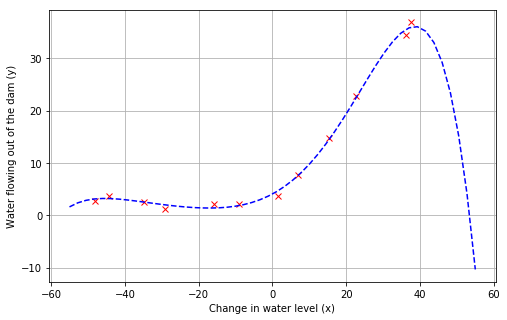

In [24]:
def plotFit(fit_theta,means,stds):
    """
    Function that takes in some learned fit values (on feature-normalized data)
    It sets x-points as a linspace, constructs an appropriate X matrix,
    un-does previous feature normalization, computes the hypothesis values,
    and plots on top of data
    """
    n_points_to_plot = 50
    xvals = np.linspace(-55,55,n_points_to_plot)
    xmat = np.ones((n_points_to_plot,1))
    
    xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
    xmat = None
    #This is undoing feature normalization
    xmat[:,1:] = None
    xmat[:,1:] = None
    plotData()
    plt.plot(None,None,'b--')

plotFit(fit_theta,stored_means,stored_stds)

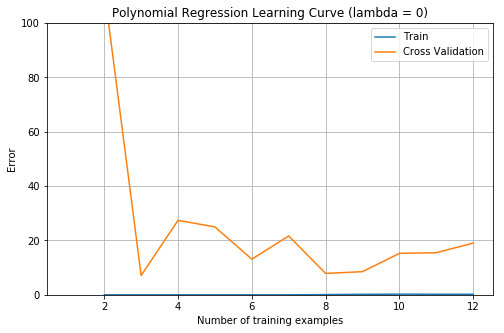

In [26]:
def plotPolyLearningCurve(mylambda=0.):

    initial_theta = np.ones((global_d+2,1))
    mym, error_train, error_val = [], [], []
    myXval, dummy1, dummy2 = featureNormalize(None)

    for x in range(1,13,1):
        train_subset = None
        y_subset = None
        mym.append(None)
        train_subset = genPolyFeatures(None,None)   
        train_subset, dummy1, dummy2 = featureNormalize(None)
        fit_theta = optimizeTheta(None,None,None,mylambda=None,print_output=False)
        error_train.append(computeCost(None,None,None,mylambda=None))
        error_val.append(computeCost(None,None,None,mylambda=None))
        
    plt.figure(figsize=(8,5))
    plt.plot(None,None,label='Train')
    plt.plot(None,None,label='Cross Validation')
    plt.legend()
    plt.title('Polynomial Regression Learning Curve (lambda = 0)')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.ylim([0,100])
    plt.grid(True)
    
plotPolyLearningCurve()

#### 3.2 Optional: Adjusting the regularization parameter

         Current function value: 8.042488
         Iterations: 5
         Function evaluations: 75
         Gradient evaluations: 64


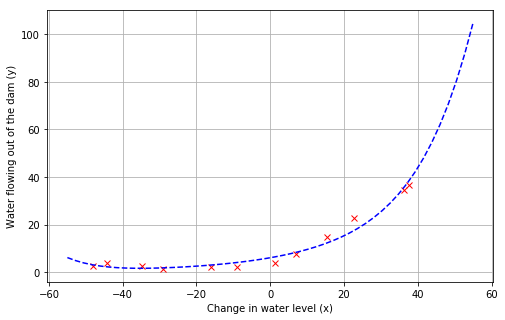

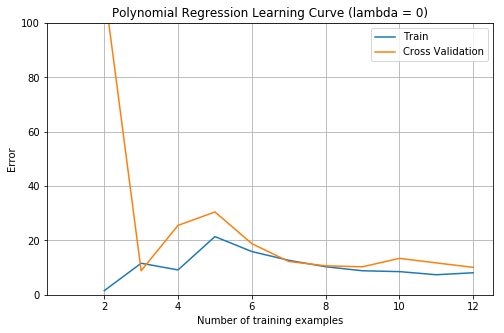

In [27]:
#Try Lambda = 1
mytheta = np.zeros((newX_norm.shape[1],1))
fit_theta = optimizeTheta(mytheta,newX_norm,y,1)
plotFit(fit_theta,stored_means,stored_stds)
plotPolyLearningCurve(1.)

         Current function value: 126.839501
         Iterations: 0
         Function evaluations: 44
         Gradient evaluations: 32


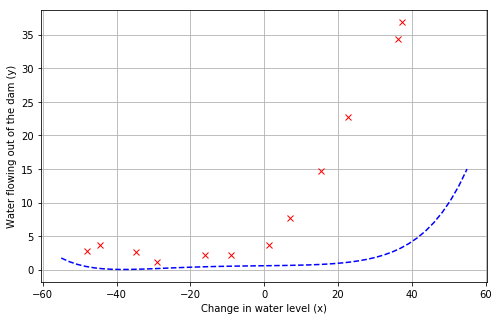

In [28]:
#Try Lambda = 100
#Note after one iteration, the lambda of 100 penalizes the theta params so hard
#that the minimizer loses precision and gives up...
#so the plot below is NOT indicative of a successful fit
mytheta = np.random.rand(newX_norm.shape[1],1)
fit_theta = optimizeTheta(mytheta,newX_norm,y,100.)
plotFit(fit_theta,stored_means,stored_stds)

#### 3.3 Selecting $\lambda$ using a cross validation set

In [29]:
#lambdas = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
lambdas = np.linspace(0,5,20)
errors_train, errors_val = [], []
for mylambda in lambdas:
    newXtrain = None
    newXtrain_norm, dummy1, dummy2 = None
    newXval = None
    newXval_norm, dummy1, dummy2 = None
    init_theta = np.ones((newX_norm.shape[1],1))
    fit_theta = optimizeTheta(None,None,None,None,False)
    errors_train.append(computeCost(None,None,None,mylambda=None))
    errors_val.append(computeCost(None,None,None,mylambda=None))

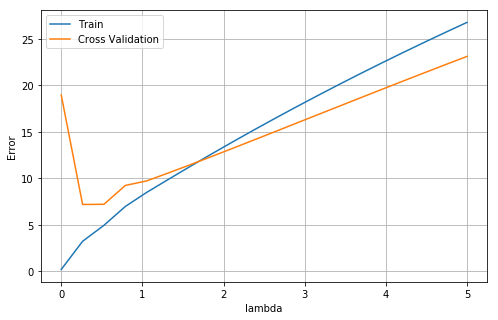

In [30]:
plt.figure(figsize=(8,5))
plt.plot(None,None,label='Train')
plt.plot(None,None,label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)